In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
train_path = r'E:/DataSet/Tianchi/security/security_train/security_train.csv'
test_path = r'E:/DataSet/Tianchi/security/security_test/security_test.csv'

train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

# train_data.head(10)
# file_id 文件编号
# label 文件标签 0-正常，1-勒索病毒， 2-挖矿程序，3-DDos木马4-蠕虫病毒 5-感染性病毒 6-后门程序 7-木马程序
# api 文件调用的API程序
# tid 调用API的线程编号
# index 线程中API的顺序编号
# train_data.info()

# <class 'pandas.core.frame.DataFrame'>
# RangeIndex: 89806693 entries, 0 to 89806692
# Data columns (total 5 columns):
#  #   Column   Dtype 
# ---  ------   ----- 
#  0   file_id  int64 
#  1   label    int64 
#  2   api      object
#  3   tid      int64 
#  4   index    int64 
# dtypes: int64(4), object(1)
# memory usage: 3.3+ GB

# train_data.describe()

#        file_id	    label	        tid	            index
# count	8.980669e+07	8.980669e+07	8.980669e+07	8.980669e+07
# mean	7.078770e+03	3.862835e+00	2.533028e+03	1.547521e+03
# std	3.998794e+03	2.393783e+00	6.995798e+02	1.412249e+03
# min	1.000000e+00	0.000000e+00	1.000000e+02	0.000000e+00
# 25%	3.637000e+03	2.000000e+00	2.356000e+03	3.490000e+02
# 50%	7.161000e+03	5.000000e+00	2.564000e+03	1.085000e+03
# 75%	1.055100e+04	5.000000e+00	2.776000e+03	2.503000e+03
# max	1.388700e+04	7.000000e+00	2.089600e+04	5.000000e+03

,file_id,label,api,tid,index
0,1,5,LdrLoadDll,2488,0
1,1,5,LdrGetProcedureAddress,2488,1
2,1,5,LdrGetProcedureAddress,2488,2
3,1,5,LdrGetProcedureAddress,2488,3
4,1,5,LdrGetProcedureAddress,2488,4
5,1,5,LdrGetProcedureAddress,2488,5
6,1,5,LdrGetProcedureAddress,2488,6
7,1,5,LdrGetProcedureAddress,2488,7
8,1,5,LdrGetProcedureAddress,2488,8
9,1,5,LdrGetProcedureAddress,2488,9


file_id    13887
label          8
api          295
tid         2782
index       5001
dtype: int64

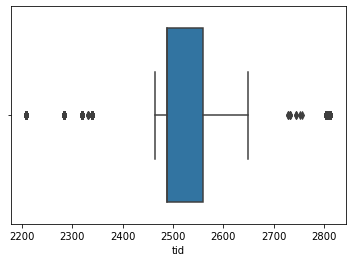

In [11]:
# 数据分布
import seaborn as sns
sns.boxplot(x=train_data[:10000]['tid'])
# 异常值

<AxesSubplot:>

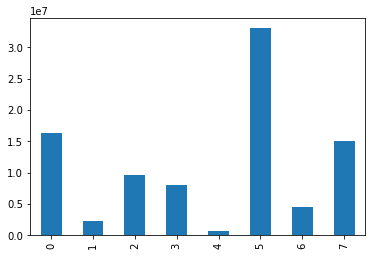

In [18]:
# 取值分布
# train_data.nunique()
# file_id    13887
# label          8
# api          295
# tid         2782
# index       5001
# dtype: int64

# 缺失值情况
# train_data.isnull().sum()
# file_id    0
# label      0
# api        0
# tid        0
# index      0
# dtype: int64
# label分布情况
train_data['label'].value_counts().sort_index().plot(kind='bar')
# train_data['label'].value_counts().sort_index().plot(kind='pie')


In [21]:
# 测试集取值分布
# test_data.nunique()
# file_id    12955
# api          298
# tid         2047
# index       5001
# dtype: int64

# 缺失值情况
# test_data.isnull().sum()
# file_id    0
# api        0
# tid        0
# index      0
# dtype: int64

file_id    0
api        0
tid        0
index      0
dtype: int64

In [35]:
# 数据重合度分析
# files_id重合度
train_files = train_data['file_id'].unique()
test_files = test_data['file_id'].unique()
print(len(set(train_files) - set(test_files)))  # 932
print(len(set(test_files) - set(train_files)))  # 0
# 说明不存在测试集有的file_id，而训练集没有的情况

train_api = train_data['api'].unique()
test_api = test_data['api'].unique()
print(len(set(train_api) - set(test_api)))  # 3
print(len(set(test_api) - set(train_api)))  # 6

print(set(train_api) - set(test_api))
# {'WSASendTo', 'EncryptMessage', 'RtlCompressBuffer'}
print(set(test_api) - set(train_api))
# {'NtDeleteFile', 'InternetGetConnectedStateExA', 'MessageBoxTimeoutW', 'CreateDirectoryExW', 'NtCreateUserProcess', 'TaskDialog'}

932
0


In [43]:
#  特征工程
def

array([6786,  816,  463, ..., 1033, 5316,  623], dtype=int64)

In [37]:
print(set(train_api) - set(test_api))  # 932
print(set(test_api) - set(train_api))  # 

{'WSASendTo', 'EncryptMessage', 'RtlCompressBuffer'}
{'NtDeleteFile', 'InternetGetConnectedStateExA', 'MessageBoxTimeoutW', 'CreateDirectoryExW', 'NtCreateUserProcess', 'TaskDialog'}
